**Задание** 

1) реализовать алгоритм на основе политик А2С, DDPG;
2) обучить агента в среде Car Racing;
3) представить исходный код, обученного агента и графики обучения агента.

Импортируем все необходимые библиотеки. 

In [1]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from stable_baselines3 import DDPG, A2C
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder
from stable_baselines3.common.callbacks import EvalCallback
import matplotlib.pyplot as plt

import moviepy.editor as mpy
import os

Создадим среду.

In [2]:
env = gym.make('CarRacing-v2')
env = DummyVecEnv([lambda: env])

C:\Users\Kvas6\anaconda3\envs\py39\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Определим параметры модели. 

In [3]:
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

**DDPG**

Создадим модель DDPG

In [4]:
model = DDPG(
    "CnnPolicy",
    env,
    action_noise=action_noise,
    learning_rate=1e-3,
    gamma=0.99,
    tau=0.005,
    batch_size=64,
    verbose=1,
    tensorboard_log="./ddpg_car_racing_tensorboard/"
)

Using cpu device
Wrapping the env in a VecTransposeImage.


C:\Users\Kvas6\anaconda3\envs\py39\lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.32GB > 46.53GB
  warnings.warn(


Обучим нашу модель

In [5]:
eval_env = gym.make('CarRacing-v2')
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path='./logs/best_model/',
    log_path='./logs/',
    eval_freq=10000,
    deterministic=True,
    render=False
)


model.learn(total_timesteps=100000, callback=eval_callback)

model.save("ddpg_car_racing")

Logging to ./ddpg_car_racing_tensorboard/DDPG_1


C:\Users\Kvas6\anaconda3\envs\py39\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
C:\Users\Kvas6\anaconda3\envs\py39\lib\site-packages\stable_baselines3\common\callbacks.py:414: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.vec_transpose.VecTransposeImage object at 0x000001DF82C96640> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x000001DF8E6F19A0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
C:\Users\Kvas6\anaconda3\envs\py39\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
 

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 7        |
|    time_elapsed    | 525      |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | 1.68     |
|    critic_loss     | 3.38e-05 |
|    learning_rate   | 0.001    |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 7        |
|    time_elapsed    | 1128     |
|    total_timesteps | 8000     |
| train/             |          |
|    actor_loss      | 3.27     |
|    critic_loss     | 0.000471 |
|    learning_rate   | 0.001    |
|    n_updates       | 7899     |
---------------------------------


C:\Users\Kvas6\anaconda3\envs\py39\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=-92.24 +/- 0.56
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | -92.2    |
| time/              |          |
|    total_timesteps | 10000    |
| train/             |          |
|    actor_loss      | 3.96     |
|    critic_loss     | 0.000319 |
|    learning_rate   | 0.001    |
|    n_updates       | 9899     |
---------------------------------
New best mean reward!
---------------------------------
| time/              |          |
|    episodes        | 12       |
|    fps             | 6        |
|    time_elapsed    | 1800     |
|    total_timesteps | 12000    |
| train/             |          |
|    actor_loss      | 4.55     |
|    critic_loss     | 9.4e-06  |
|    learning_rate   | 0.001    |
|    n_updates       | 11899    |
---------------------------------
---------------------------------
| time/              |          |
|   

Загрузим модель и запустим тестовый эпизод.

In [6]:
model = DDPG.load("ddpg_car_racing")

obs = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    env.render()
env.close()

C:\Users\Kvas6\anaconda3\envs\py39\lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.32GB > 37.41GB
  warnings.warn(
C:\Users\Kvas6\anaconda3\envs\py39\lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Построим график обучения модели. 

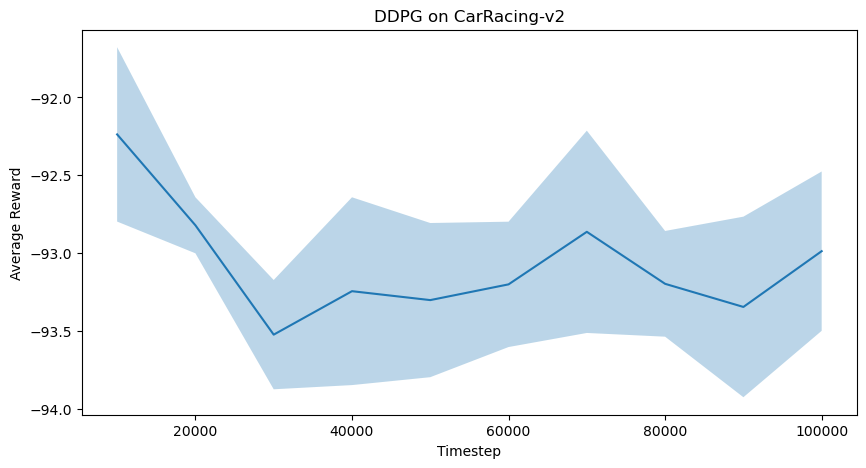

In [7]:
results = np.load('./logs/evaluations.npz')

plt.figure(figsize=(10, 5))
plt.plot(results['timesteps'], results['results'].mean(axis=1))
plt.fill_between(results['timesteps'], results['results'].mean(axis=1) - results['results'].std(axis=1),
                 results['results'].mean(axis=1) + results['results'].std(axis=1), alpha=0.3)
plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.title('DDPG on CarRacing-v2')
plt.show()

**A2C**

Создадим модель А2С

In [10]:
model = A2C(
    "CnnPolicy",
    env,
    learning_rate=1e-3,
    gamma=0.99,
    n_steps=5,
    vf_coef=0.5,
    ent_coef=0.01,
    max_grad_norm=0.5,
    verbose=1,
    tensorboard_log="./a2c_car_racing_tensorboard/"
)

Using cpu device
Wrapping the env in a VecTransposeImage.


Настроем callback для оценки модели

In [11]:
eval_env = gym.make('CarRacing-v2')
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path='./logs/a2c_best_model/',
    log_path='./logs/a2c_logs/',
    eval_freq=10000,
    deterministic=True,
    render=False
)

Обучаем модель

In [12]:
model.learn(total_timesteps=100000, callback=eval_callback)

model.save("a2c_car_racing")

Logging to ./a2c_car_racing_tensorboard/A2C_1
------------------------------------
| time/                 |          |
|    fps                | 94       |
|    iterations         | 100      |
|    time_elapsed       | 5        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -4.32    |
|    explained_variance | 0.0316   |
|    learning_rate      | 0.001    |
|    n_updates          | 99       |
|    policy_loss        | 0.17     |
|    std                | 1.02     |
|    value_loss         | 0.00199  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 94       |
|    iterations         | 200      |
|    time_elapsed       | 10       |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -4.43    |
|    explained_variance | -0.195   |
|    learning_rate      | 0.001    |
|    n_updates          | 199

Построим график обучения модели. 

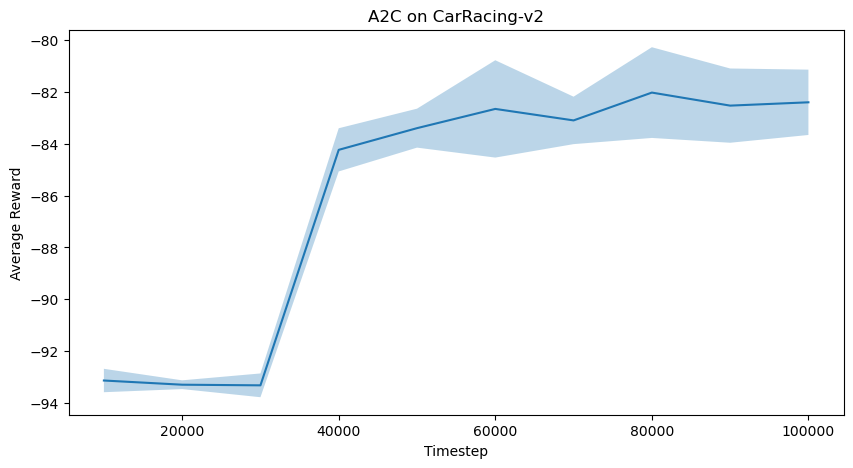

In [17]:
results = np.load('./logs/a2c_logs/evaluations.npz')

plt.figure(figsize=(10, 5))
plt.plot(results['timesteps'], results['results'].mean(axis=1))
plt.fill_between(results['timesteps'], results['results'].mean(axis=1) - results['results'].std(axis=1),
                 results['results'].mean(axis=1) + results['results'].std(axis=1), alpha=0.3)
plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.title('A2C on CarRacing-v2')
plt.show()

Созлалим короткий ролик с результатми обучения модели. 

In [15]:
def make_env(env_id):
    env = gym.make(env_id, render_mode='rgb_array')
    return env

# Обновляем создание среды для видео записи
def record_video(env_id, model, video_length=500, prefix='', video_folder='videos/'):
    eval_env = DummyVecEnv([lambda: make_env(env_id)])
    eval_env = VecVideoRecorder(
        eval_env,
        video_folder=video_folder,
        record_video_trigger=lambda x: x == 0,
        video_length=video_length,
        name_prefix=prefix
    )

    obs = eval_env.reset()
    for _ in range(video_length):
        action, _ = model.predict(obs)
        obs, _, _, _ = eval_env.step(action)
    eval_env.close()

# Записываем видео
record_video('CarRacing-v2', model, video_length=1000, prefix='a2c_car_racing')

# Создание ролика в mp4 формате с помощью moviepy
video_path = "videos/a2c_car_racing-step-0-to-step-1000.mp4"
clip = mpy.VideoFileClip(video_path)
clip.write_videofile("a2c_car_racing_result.mp4", codec="libx264")


Saving video to D:\dev\otus\videos\a2c_car_racing-step-0-to-step-1000.mp4
Moviepy - Building video D:\dev\otus\videos\a2c_car_racing-step-0-to-step-1000.mp4.
Moviepy - Writing video D:\dev\otus\videos\a2c_car_racing-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready D:\dev\otus\videos\a2c_car_racing-step-0-to-step-1000.mp4
Moviepy - Building video a2c_car_racing_result.mp4.
Moviepy - Writing video a2c_car_racing_result.mp4



Moviepy - Done !
Moviepy - video ready a2c_car_racing_result.mp4


# Вывод

Было изучено 2е  политики обучения. A2C показало более стабильный результат работы, что также мы можем видеть и по графикам обучения, так же A2C обучилась намного быстрее чем DDPG. Хотя именно DDPG наболее лучге подходит для зачат управдения. Но видимо я не смог найти оптимальные параметры. Короткий видеоролик демострирует результат обучения. Провести более лучшие анализы не позволило железо. Модели обучались сутки. 